# 일반 모델의 변수 중요도
* Permutation Feature Importance


## 1.환경준비

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import *

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session

### 2) 데이터 로딩

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


* 변수 설명
    * crim : 범죄율
    * zn : 대저택 비율
    * indus : 산업단지 비율
    * chas : 찰스 강변 여부
    * nox : 일산화질소 농도(공기오염도)
    * rm : 평균 주택당 방 수
    * age : 30년 이상된 주택 비율
    * dis : 주요 업무 지역 접근성 지수
    * rad : 고속도로 접근성 지수
    * tax  1만 달러당 재산세
    * ptratio : 교사 1명당 학생수
    * lstat : 하위계층 비율
    * black : 흑인비율(원래 숫자를 변형한 것임)
    * mdev : 타운별 집값 중위수(단위 : 1000달러)

### 3) 필요한 함수 생성

In [3]:
# 변수 중요도 plot1
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

In [4]:
# 변수 중요도 plot2
def plot_PFI(pfi, col_names):
    plt.figure(figsize = (14,5))
    plt.subplot(1,2,1)
    for i,vars in enumerate(col_names) :
        sns.kdeplot(pfi.importances[i], label = vars)
    plt.legend()
    plt.grid()

    sorted_idx = pfi.importances_mean.argsort()
    plt.subplot(1,2,2)
    plt.boxplot(pfi.importances[sorted_idx].T, vert=False, labels=col_names[sorted_idx])
    plt.axvline(0, color = 'r')
    plt.grid()
    plt.show()

## 2.데이터 준비


### 1) x, y로 나누기

In [5]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

### 2) 가변수화

### 3) train : validation 분할

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 2022)
x_train.shape

(404, 12)

### 4) 스케일링

In [7]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

## 3.Permutation Feature Importance

* model1 : SVM
* model2 : DL

In [8]:
from sklearn.inspection import permutation_importance

### 1) SVM 모델

In [9]:
model1 = SVR()
model1.fit(x_train_s, y_train)

SVR()

* permutation feature importance 구하기

In [11]:
pfi1 = permutation_importance(model1, x_val_s, y_val, n_repeats=10, scoring = 'r2', random_state=2022)

In [12]:
pfi1

{'importances_mean': array([0.01124064, 0.02393944, 0.04219761, 0.04474468, 0.0347364 ,
        0.14629916, 0.06519505, 0.0253019 , 0.03960922, 0.07816104,
        0.07821846, 0.24740766]),
 'importances_std': array([0.00305263, 0.00909158, 0.00803779, 0.01681181, 0.01124771,
        0.01556842, 0.02008155, 0.01634439, 0.0135496 , 0.0213462 ,
        0.01522869, 0.02799449]),
 'importances': array([[0.01407583, 0.01370718, 0.01074491, 0.01610413, 0.00929864,
         0.00701685, 0.01497169, 0.0084053 , 0.00806235, 0.01001949],
        [0.01666241, 0.02779629, 0.03625315, 0.02057153, 0.03777106,
         0.01501232, 0.02596703, 0.00663567, 0.02418448, 0.02854044],
        [0.02619254, 0.04315343, 0.04529441, 0.048055  , 0.04677711,
         0.04132721, 0.04357226, 0.03066814, 0.04105508, 0.05588089],
        [0.05879783, 0.03684019, 0.03652592, 0.08198676, 0.04783469,
         0.0331626 , 0.04885816, 0.01400102, 0.04646476, 0.04297491],
        [0.02681919, 0.03453089, 0.02874114, 0.057

* feature별 Score 분포

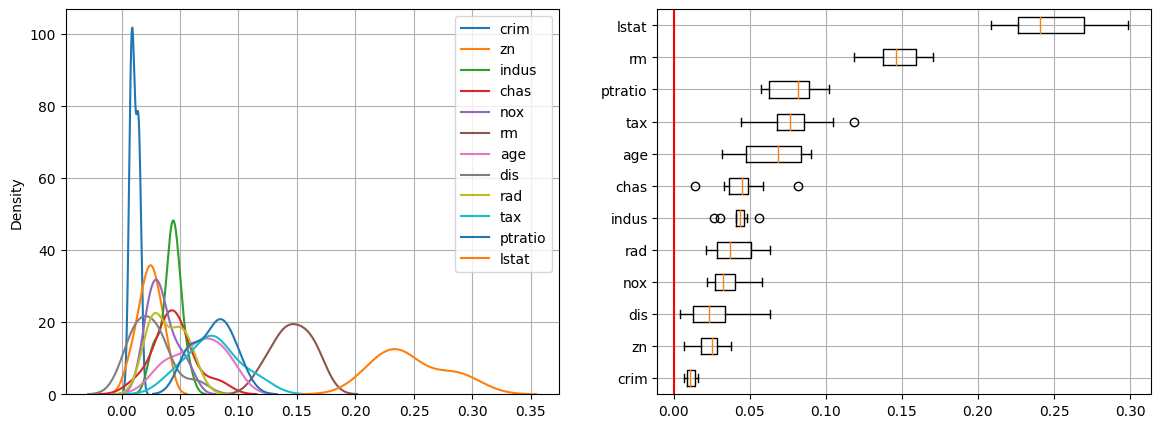

In [13]:
plot_PFI(pfi1, x.columns)

* 평균값으로 변수중요도 그래프 그리기

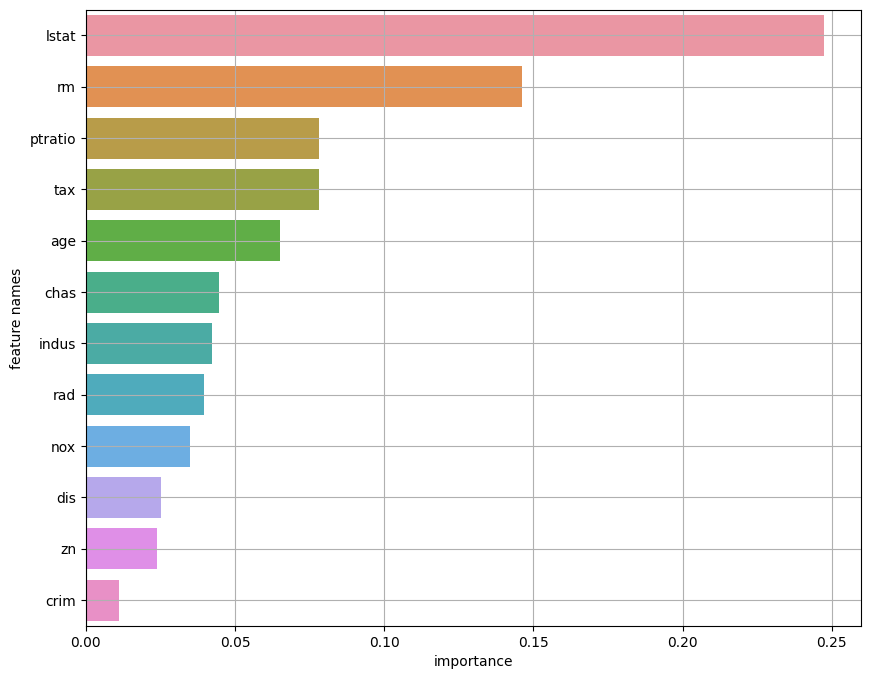

In [14]:
result = plot_feature_importance(pfi1.importances_mean, list(x_train))

### 2) DL 모델

* 간단한 DL 모델을 생성해 봅시다.

In [16]:
x_train_s.shape[1]

12

In [17]:
nfeatures = x_train_s.shape[1]
clear_session()

model2 = Sequential([Dense(32, input_shape = [nfeatures,], activation = 'relu'),
                     Dense(8, activation = 'relu'),
                     Dense(1)
                     ])

model2.compile(optimizer = 'adam', loss = 'mse')
history = model2.fit(x_train_s, y_train, epochs = 200, validation_split = .2).history

Epoch 1/200
11/11 [==============================] - 6s 31ms/step - loss: 627.2780 - val_loss: 594.0821
Epoch 2/200
11/11 [==============================] - 0s 9ms/step - loss: 621.2833 - val_loss: 589.4225
Epoch 3/200
11/11 [==============================] - 0s 10ms/step - loss: 616.3928 - val_loss: 585.2826
Epoch 4/200
11/11 [==============================] - 0s 10ms/step - loss: 611.7940 - val_loss: 580.4641
Epoch 5/200
11/11 [==============================] - 0s 9ms/step - loss: 606.3273 - val_loss: 574.4077
Epoch 6/200
11/11 [==============================] - 0s 10ms/step - loss: 599.5502 - val_loss: 566.8776
Epoch 7/200
11/11 [==============================] - 0s 11ms/step - loss: 591.2007 - val_loss: 557.7998
Epoch 8/200
11/11 [==============================] - 0s 9ms/step - loss: 581.0188 - val_loss: 546.3967
Epoch 9/200
11/11 [==============================] - 0s 10ms/step - loss: 567.1566 - val_loss: 527.9407
Epoch 10/200
11/11 [==============================] - 0s 11ms/step 

* permutation feature importance 구하기
    * deep learning 모델에 대해서는 명시적으로 scoring = 'r2'을 지정해 줘야 합니다.

In [18]:
pfi2 = permutation_importance(model2, x_val_s, y_val, n_repeats=10, scoring = 'r2', random_state=2022)

4/4 [==============================] - 0s 3ms/step


In [19]:
pfi2

{'importances_mean': array([ 0.06341207,  0.0104634 ,  0.00650396, -0.00300369,  0.05443081,
         0.22221385,  0.00354589,  0.06730292,  0.16938744,  0.20517723,
         0.04826262,  0.50197641]),
 'importances_std': array([0.01783935, 0.00486168, 0.00682102, 0.01058006, 0.01732582,
        0.03670027, 0.00705099, 0.02859334, 0.04219142, 0.03604834,
        0.01539868, 0.08769185]),
 'importances': array([[ 6.78222392e-02,  7.76612549e-02,  6.77459736e-02,
          7.62021086e-02,  4.48498633e-02,  7.09649377e-02,
          9.75092670e-02,  3.83154233e-02,  4.39612346e-02,
          4.90883544e-02],
        [ 3.49304916e-03,  1.09391224e-02,  4.45442972e-03,
          1.50586710e-02,  1.15875725e-02,  8.87135640e-03,
          2.10763452e-02,  7.94517166e-03,  8.66651854e-03,
          1.25417913e-02],
        [ 3.06636281e-04,  3.98276748e-03,  3.16424951e-03,
          5.19178757e-03,  3.65142112e-03, -2.95134236e-04,
          6.26561208e-03,  2.47090888e-02,  6.91039881e-03,


* feature별 Score 분포

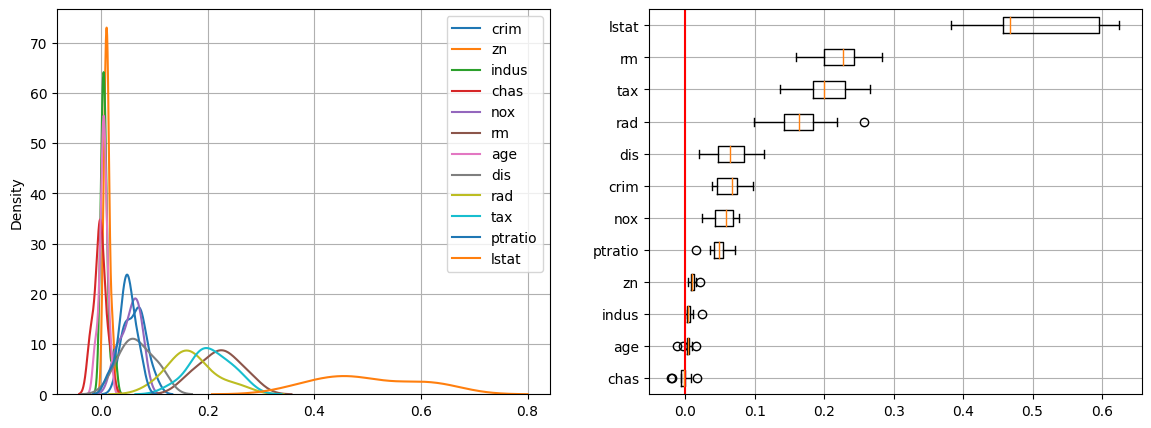

In [20]:
plot_PFI(pfi2, x.columns)

* 평균값으로 변수중요도 그래프 그리기

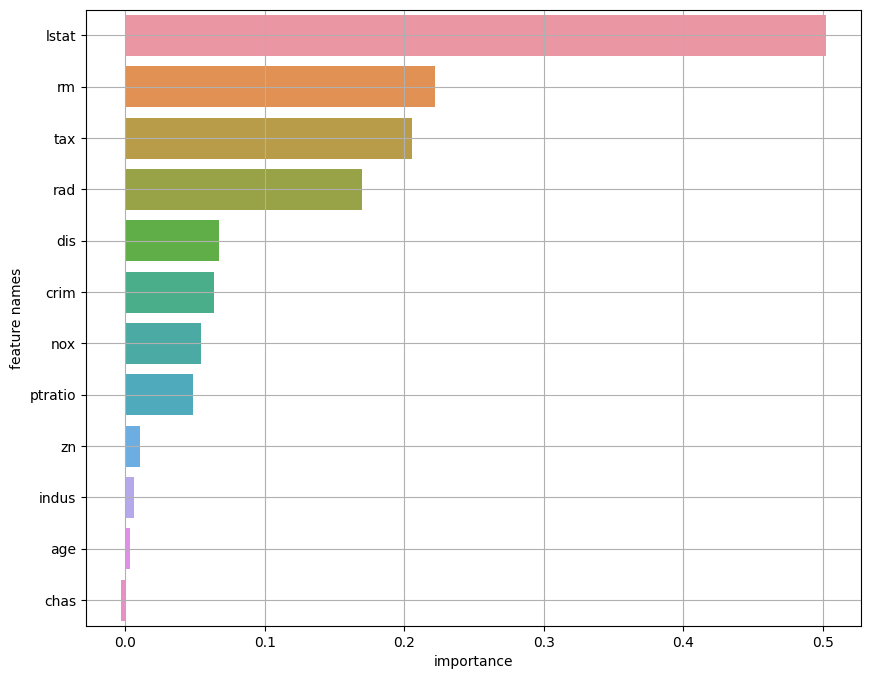

In [21]:
result = plot_feature_importance(pfi2.importances_mean, list(x_train))

In [22]:
from sklearn.metrics import *

In [23]:
pred1 = model1.predict(x_val_s)
print(mean_absolute_error(y_val, pred1))

3.1543745600855515


In [24]:
pred2 = model2.predict(x_val_s)
print(mean_absolute_error(y_val, pred2))

4/4 [==============================] - 0s 3ms/step
3.3393510201398056


## 4.실습 : 직원 이직 예측모델 변수 중요도 비교

### 1) 데이터 준비

* 데이터 로딩

In [25]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition2.csv"
data = pd.read_csv(path)
data.head(10)

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1
5,0,44,Research & Development,2,1,Medical,Male,Manufacturing Director,3,Single,10209,5,2,16,2,2,2
6,0,41,Sales,10,2,Life Sciences,Male,Sales Executive,4,Single,6230,7,4,16,3,3,14
7,0,25,Sales,18,1,Life Sciences,Male,Sales Executive,3,Married,6232,2,2,6,3,2,3
8,0,50,Research & Development,2,3,Medical,Male,Research Director,3,Married,17639,5,4,30,3,3,4
9,0,47,Sales,4,2,Life Sciences,Female,Sales Executive,4,Single,4163,1,3,9,0,3,9


|	변수 명	|	내용	|	구분	|
|	----	|	----	|	----	|
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|
|	Age	|	나이	|	숫자	|
|	BusinessTravel	|	출장 빈도(범주)	|		|
|	Department	|	현 부서	|		|
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|
|	EducationField	|	전공	|		|
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|
|	Gender	|	성별	|		|
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	JobRole	|	직무	|		|
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	MaritalStatus	|	결혼상태	|		|
|	MonthlyIncome	|	월급	|	숫자	|
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|


In [26]:
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [27]:
y.value_counts() / y.shape[0]

0    0.913043
1    0.086957
Name: Attrition, dtype: float64

* 가변수화 Dummy Variable

In [28]:
dummy_vars = ['Education','Department','EducationField','Gender','JobRole','JobSatisfaction','MaritalStatus',
              'RelationshipSatisfaction','WorkLifeBalance'] # 가변수화 대상 변수 이름 리스트 만든다
x = pd.get_dummies(x, columns = dummy_vars, drop_first=True)

* 데이터 분할
    * 이미 test set은 분할되어 있다고 가정합니다.
    * 주어진 데이터를 train set : validation set 으로 분할

In [29]:
# train_val에서 train : val = 8 : 2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 2022)

In [30]:
print(x_train.shape, x_val.shape)

(920, 38) (230, 38)


* class balance를 맞추기 위한 resampling

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
smote = SMOTE()
sm_x_train, sm_y_train = smote.fit_resample(x_train, y_train)

* 스케일링

In [33]:
scaler = MinMaxScaler()
sm_x_train_s = scaler.fit_transform(sm_x_train)
x_val_s = scaler.transform(x_val)

### 2) 모델링 및 변수 중요도 계산하기

* model1 : SVM
* model2 : KNN

In [34]:
from sklearn.inspection import permutation_importance

#### ① SVM 모델

* 모델링

In [36]:
model1 = SVC()
model1.fit(sm_x_train_s, sm_y_train)

SVC()

* permutation feature importance 구하기

In [37]:
# pfi2 = permutation_importance(model2, x_val_s, y_val, n_repeats=10, scoring = 'r2', random_state=2022)
pfi_svc = permutation_importance(model1, x_val_s, y_val, n_repeats=10)
pfi_svc

{'importances_mean': array([ 0.00130435, -0.00086957, -0.00173913,  0.00173913,  0.        ,
        -0.00304348, -0.00086957,  0.00217391,  0.01043478, -0.00086957,
         0.00478261, -0.00652174,  0.01173913,  0.00347826,  0.00130435,
         0.00652174,  0.00782609,  0.00434783,  0.00217391,  0.00913043,
        -0.00434783,  0.        ,  0.        , -0.00173913,  0.00304348,
         0.0126087 , -0.00347826, -0.0026087 ,  0.00086957, -0.00086957,
         0.00217391,  0.00304348, -0.00521739, -0.00652174,  0.00347826,
         0.00217391,  0.01565217,  0.01      ]),
 'importances_std': array([0.00199242, 0.00173913, 0.00347826, 0.00288402, 0.00274981,
        0.00278397, 0.00173913, 0.00486102, 0.00347826, 0.00379035,
        0.00130435, 0.00707775, 0.00436951, 0.00425998, 0.00278397,
        0.00558488, 0.00173913, 0.00194441, 0.00217391, 0.00234138,
        0.00274981, 0.        , 0.00194441, 0.00212999, 0.00339576,
        0.00565217, 0.00173913, 0.00347826, 0.00468275, 0.003

* feature별 Score 분포

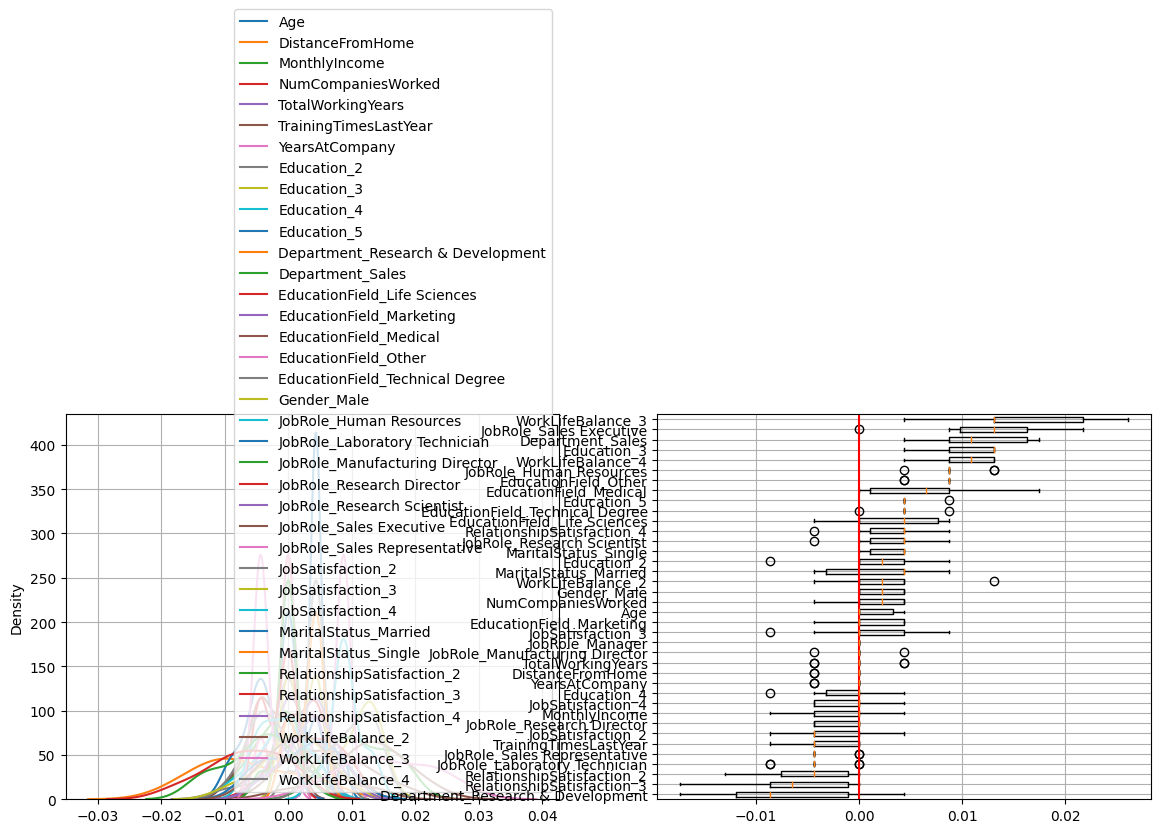

In [41]:
plot_PFI(pfi_svc, x.columns)

* 평균값으로 변수중요도 그래프 그리기

,feature_names,feature_importance
0,WorkLifeBalance_3,0.015652
1,JobRole_Sales Executive,0.012609
2,Department_Sales,0.011739
3,Education_3,0.010435
4,WorkLifeBalance_4,0.010000
5,JobRole_Human Resources,0.009130
6,EducationField_Other,0.007826
7,EducationField_Medical,0.006522
8,Education_5,0.004783
9,EducationField_Technical Degree,0.004348


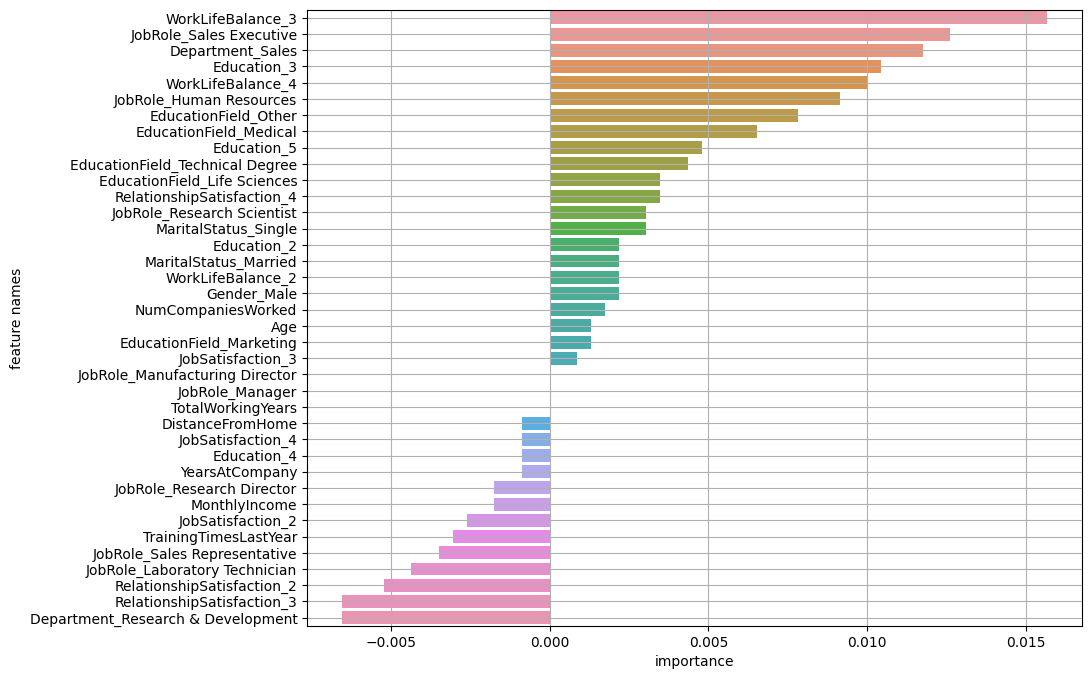

In [42]:
plot_feature_importance(pfi_svc.importances_mean, x.columns)
# 마이너스가 나오는 이유는 1. 원래보다 섞었을 때가 성능이 더 좋아

* 예측 및 평가

In [44]:
pred_svc = model1.predict(x_val_s)
accuracy_score(y_val, pred_svc)

0.9391304347826087

#### ② KNN 모델

* 모델링

In [45]:
model2 = KNeighborsClassifier()
model2.fit(sm_x_train_s, sm_y_train)

KNeighborsClassifier()

* permutation feature importance 구하기

In [46]:
pfi_knn = permutation_importance(model2, x_val_s, y_val, n_repeats=10, )
pfi_knn

{'importances_mean': array([ 0.01347826,  0.01217391,  0.01130435,  0.00478261,  0.01695652,
         0.01304348,  0.00652174,  0.01434783,  0.04521739,  0.04652174,
        -0.00086957,  0.06478261,  0.03391304,  0.04652174,  0.01956522,
         0.03521739,  0.00173913,  0.00913043,  0.00869565,  0.0126087 ,
         0.00913043,  0.01565217,  0.01956522,  0.00347826,  0.02652174,
         0.02086957,  0.00304348,  0.0226087 ,  0.02782609,  0.03434783,
         0.03043478,  0.02826087,  0.02173913,  0.0273913 ,  0.02826087,
         0.03      ,  0.05521739,  0.00478261]),
 'importances_std': array([0.01055188, 0.00722315, 0.00484153, 0.0053072 , 0.00361158,
        0.00777763, 0.00591368, 0.0075432 , 0.01652174, 0.01100782,
        0.00173913, 0.00941583, 0.00968307, 0.01319477, 0.0040085 ,
        0.00941583, 0.00288402, 0.00304348, 0.00701066, 0.00130435,
        0.0053072 , 0.00212999, 0.0040085 , 0.00173913, 0.00628558,
        0.00722315, 0.00199242, 0.0079697 , 0.01014079, 0.010

* feature별 Score 분포

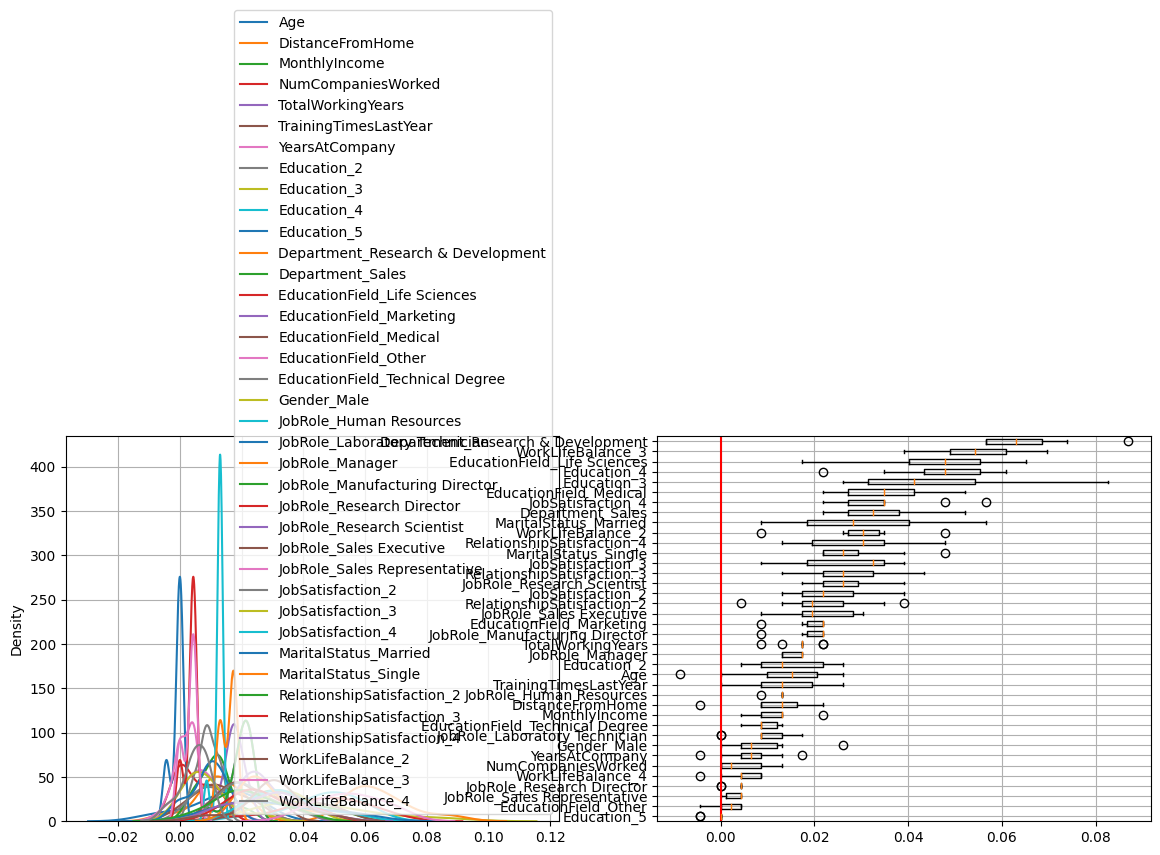

In [47]:
plot_PFI(pfi_knn, x.columns)

* 평균값으로 변수중요도 그래프 그리기

,feature_names,feature_importance
0,Department_Research & Development,0.064783
1,WorkLifeBalance_3,0.055217
2,EducationField_Life Sciences,0.046522
3,Education_4,0.046522
4,Education_3,0.045217
5,EducationField_Medical,0.035217
6,JobSatisfaction_4,0.034348
7,Department_Sales,0.033913
8,MaritalStatus_Married,0.030435
9,WorkLifeBalance_2,0.030000


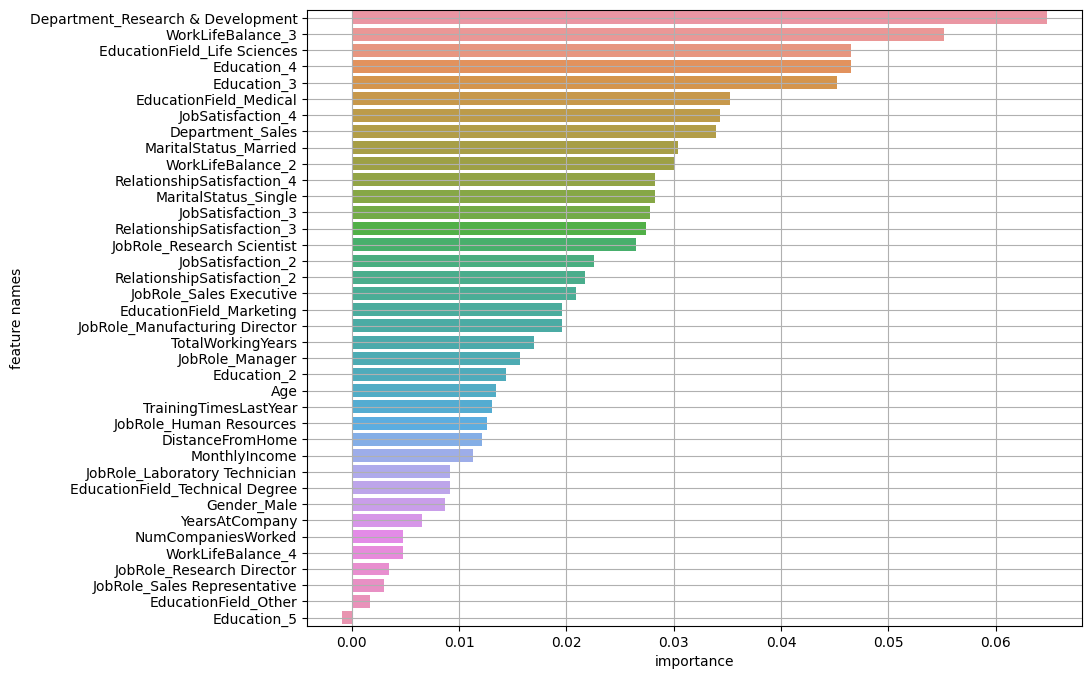

In [48]:
plot_feature_importance(pfi_knn.importances_mean, x.columns)

In [49]:
pred_knn = model2.predict(x_val_s)
accuracy_score(y_val, pred_knn)

0.8434782608695652